# **Decision Tree Classifier**

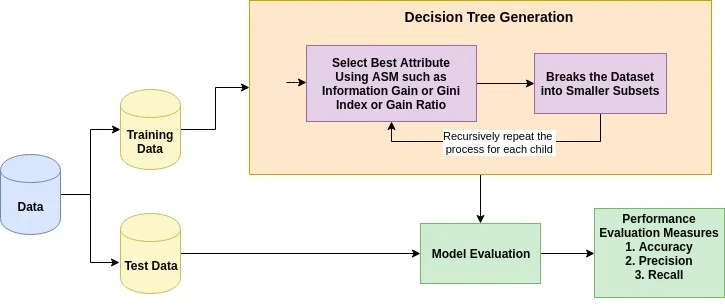

In [ ]:
!pip install --upgrade scikit-learn

# 1. Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import sklearn # machine learning

# 2. Import dataset
sklearn documentation : https://scikit-learn.org/stable/

In [ ]:
# import iris dataset with sklearn.datasets
from sklearn.datasets import load_iris #importe la base de donne
iris=load_iris() #la place dans une variable pour pouvoir afficher l'afficher
print(iris.keys())
print(iris.DESCR)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

## For reference, here are pictures of the three flowers species:

![https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

# 3. Dataset to Pandas DataFrame
Pandas Documentation : https://pandas.pydata.org/docs/reference/frame.html

In [ ]:
# Put iris into a pandas dataframe with the target variable (which we will try to predict) as the last column
df_iris=pd.DataFrame(iris.data,columns=iris.feature_names )#crer un DataFrame
df_iris['target']=iris.target #creation de la nouvelle colonne target
print(df_iris)



     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [ ]:
# First 10 values of the dataset // affiche les 1à premieres valeurs du dataFrame
#print(df_iris.head(10))
print(df_iris.target.head(2))

0    0
1    0
Name: target, dtype: int64


# 4. Exploratory data analysis

In [ ]:
# Shape of the dataset (nb of rows and columns) // revoie la dimension du tableau
print(df_iris.shape)
# Name of the columns
df_iris.columns
print(df_iris.columns)


(150, 5)
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [ ]:
#Information about the dataset DataFrame
df_iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Description of Iris dataset (mean, std, min, max, quartiles)
df_iris.describe()  #affiche la description du dataFrame

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

### Frequency distribution of values in categorical variables

In [ ]:
# Names of the target values
print(iris.target_names)   #target_name est un attribut qui contient le nom des targets


# Count of each target value
print(df_iris.target.value_counts())  # compte le nobre de valeur cible

# Same as above but in percentage
print(df_iris['target'].value_counts(normalize=True)) # met la valeur en poucentage

['setosa' 'versicolor' 'virginica']
0    50
1    50
2    50
Name: target, dtype: int64
0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64


cela indique que la valeut target(0,1,2) apparatit 5Ofois dans le jeu donnée.
normalize =true renvoie la frequence relative de chaque valeur unique dans la colonne 'target' du dataframe 'df_iris (exprimer en pourcentage)

### Missing values in variables

In [ ]:
missing_value=df_iris.isnull().sum() # somme des valeur manquante
print(missing_value)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


isnull() permet de verifier les valeurs manquante dans un dataFramme et
isnull().sum() renvoie la sommes des valeurs manquantes de chaque colonne du dataframe

## Correlation between variables

In [ ]:
# Correlation matrix between all the features
df_iris.corr()



sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000

la methode corr() calcul la correlation par paire entre toutes les entités du dataframe

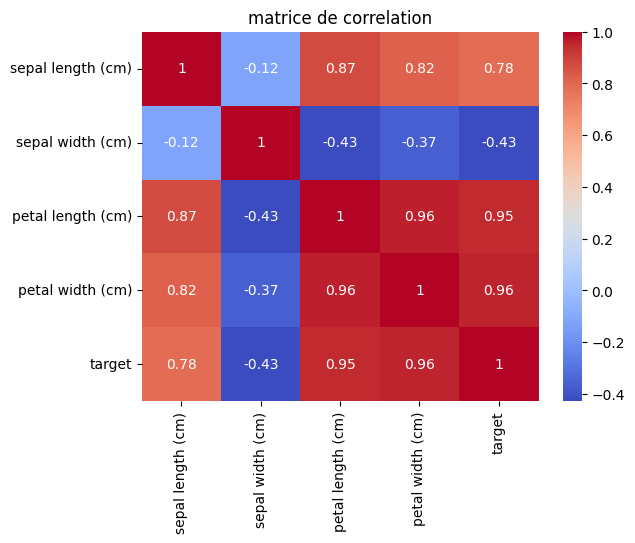

In [ ]:
# Heatmap of the correlation matrix using seaborn https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(df_iris.corr() , annot=True, cmap = "coolwarm")
plt.title("matrice de correlation")
plt.show()

seaborn est une bibliotheque de visualisation de données python basée sur matplotlib.
annot=True => spécifie si les valeurs doivent être annotées dans chaque cellule de la heatmap
cmap='coolwarm'`=> Ce paramètre spécifie la palette de couleurs à utiliser pour la heatmap. Ici, la palette 'coolwarm' est utilisée, ce qui donne une transition de

In [ ]:
# print the most correlated features with the target variable (absolute value)
print(df_iris.corr().target.abs().sort_values(ascending = False))

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)     0.426658
Name: target, dtype: float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Visualizing the data

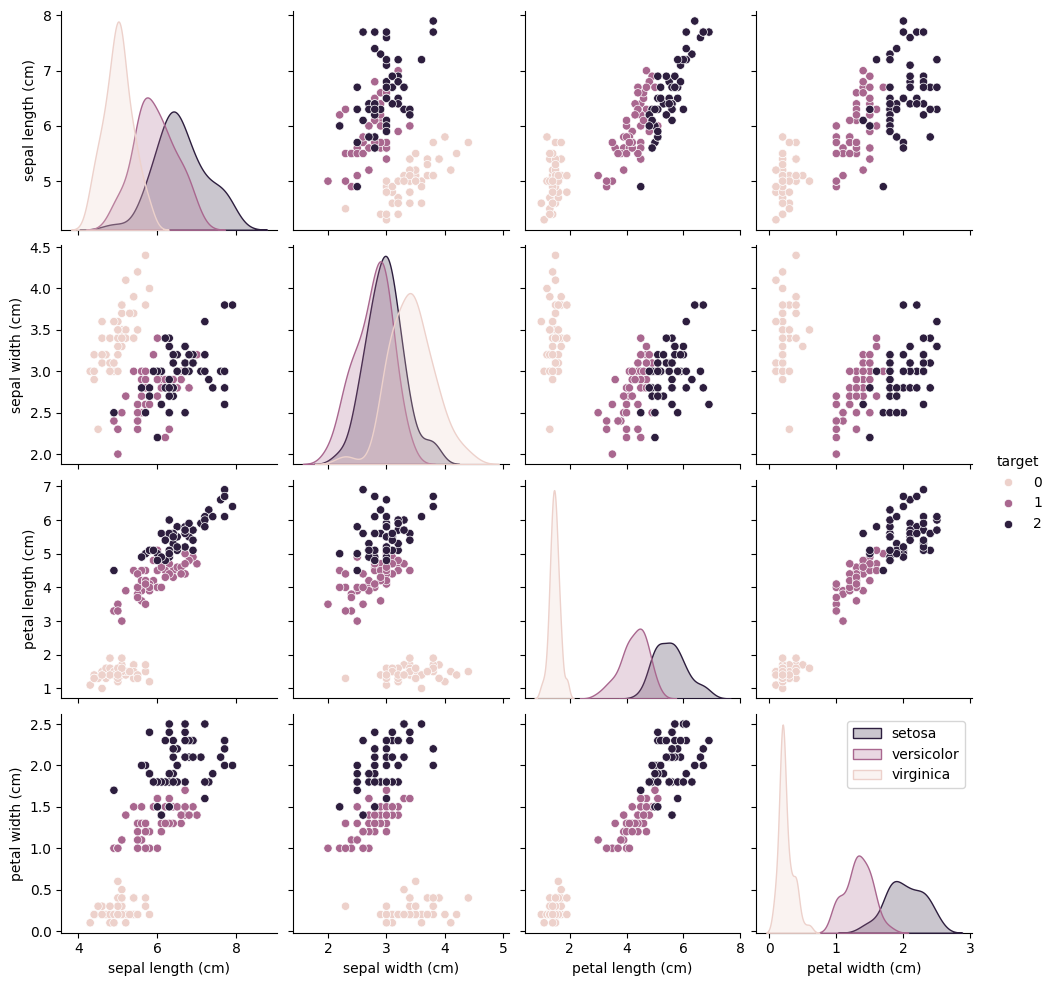

In [ ]:
# Plot the pairwise relations in the iris dataset # tracer les relations par paire
sns.pairplot(df_iris, hue = 'target', height=2.5 )
plt.legend(iris.target_names)
plt.show()


# 5. Declare features vector and target variable

In [ ]:
# X is the feature set and y is the target variable
x = df_iris.drop(columns='target') #et supprime la cible de x
y = df_iris['target']  #affecte la variable cible à y
print(x)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

# 6. Split data into separate training and test sets

In [ ]:
# Use sklearn.model_selection   #diviser les données en 2 (entrainement et test)
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x,y, test_size= 0.33, random_state = 42)

x données d'entrées et y represente ls cible, test-size = 0.33 signifie que 33% des données seront utlisées pour l'ensemble de test et le rest pour l'entrainement. Randon_state=42 garantit la reproduction des resultats en fixant la graine aléatoire.

In [ ]:
# Check the shapes of each subset #verifier les formes de chaque ensemble
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(100, 4) (50, 4)
(100,) (50,)


In [ ]:
# Count the unique values in each of the subsets =>compter mles valeurs unique dans chacun des osus ensemble
print(y_train.value_counts())
print(y_test.value_counts())



1    35
2    34
0    31
Name: target, dtype: int64
0    19
2    16
1    15
Name: target, dtype: int64


# 7. Feature Engineering - Data Encoding

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [ ]:
# check data types in X_train
x_train.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

# 8. Decision Tree Classifier with criterion gini index

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index=> creer une instance de AD avec gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
print(clf_gini)
# fit the model aka train the model on X_train
clf_gini.fit(x_train,y_train)  # enntraine le modele



DecisionTreeClassifier(max_depth=3, random_state=0)


DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [ ]:
y_pred_gini=clf_gini.predict(x_test)
print(y_pred_gini)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


### Check accuracy score with criterion gini index using sklearn.metrics

In [ ]:
from sklearn.metrics  import accuracy_score
print("le score de precision(accuracy) du modele avec critere de gini:{0:0.4f} ". format(accuracy_score(y_test, y_pred_gini)))

le score de precision(accuracy) du modele avec critere de gini:0.9800 


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Check for overfitting and underfitting

In [ ]:
#compare training and test accuracies
print("score ensemble trainning:{0:.4f}".format(clf_gini.score(x_train, y_train)))
print("score ensemble test:{0:.4f}".format(clf_gini.score(x_test, y_test)))


score ensemble trainning:0.9700
score ensemble test:0.9800


Ici, la précision de l'ensemble d'entraînement est de 0,97, tandis que la précision de l'ensemble de test est de 0,98. Ces deux valeurs sont tout à fait comparables. Il n'y a donc aucun signe de surajustement.

### Visualizing the decision tree

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.25, 0.375, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

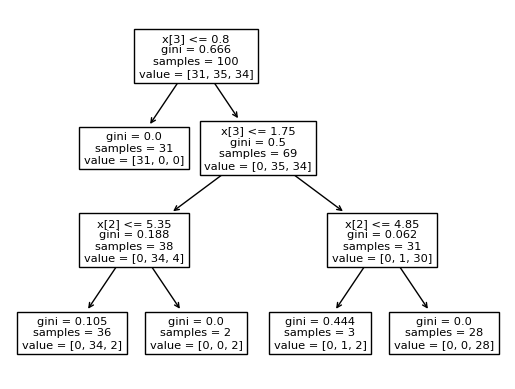

In [ ]:
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))


### Visualize decision-trees with graphviz

In [ ]:
import graphviz
print(x_train.columns)

dot_data=tree.export_graphviz(clf_gini, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


# 9. Decision Tree Classifier with criterion entropy

---



In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_entr = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
print(clf_entr)
#training Model => entrainer le model
clf_entr.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

### Predict the Test set results with criterion entropy

In [ ]:
#predire le resulat de l'ensemble de test à l'aide de l'entropy
y_pred_entr=clf_entr.predict(x_test)

NameError: name 'clf_entr' is not defined

### Check accuracy scores with criterion entropy

In [ ]:
#verifier le scores de precision à l'aide de critere entropy
print("le score precision accuracy est :",  accuracy_score(y_test, y_pred_entr))

le score precision accuracy est : 0.96


### Check for overfitting and underfitting

In [ ]:
#compare training and test accuracies => comprarer les donneés d'entrainement et test
print("les donnees entrainements sont : {:.4f}".format(clf_entr.score(x_train, y_train)))
print("les donnees test sont : {:.4f}".format(clf_entr.score(x_test, y_test)))


les donnees entrainements sont : 0.9900
les donnees test sont : 0.9600


Nous pouvons constater que le score de l'ensemble d'entraînement et le score de l'ensemble de test sont les mêmes que ci-dessus. Ces deux valeurs sont tout à fait comparables. Il n'y a donc aucun signe de surajustement.

In [ ]:
accu_train , accu_test =[],[]
for i in range (1,20):
  clf_en_i=DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
  clf_en_i.fit(x_train, y_train)
  accu_train.append(clf_en_i.score(x_train,y_train))
  accu_test.append(clf_en_i.score(x_test, y_test))
pd.DataFrame(data=[accu_train,accu_test], index=['train acc','test acc'])

0     1     2     3     4     5     6     7     8     9     10  \
train acc  0.66  0.95  0.97  0.98  0.99  1.00  1.00  1.00  1.00  1.00  1.00   
test acc   0.68  0.98  0.98  0.98  0.96  0.98  0.98  0.98  0.98  0.98  0.98   

             11    12    13    14    15    16    17    18  
train acc  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  
test acc   0.98  0.98  0.98  0.98  0.98  0.98  0.98  0.98

### Visualize decision tree with sklearn.tree

In [ ]:
#visualiser l'arbre de decision
from sklearn import tree

tree.plot_tree(clf_entr )

[Text(0.4444444444444444, 0.9166666666666666, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.75, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.25, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.25, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.08333333333333333, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4444444444444444, 0.08333333333333333, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.4444444444444444, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),

### Visualize decision tree with graphviz

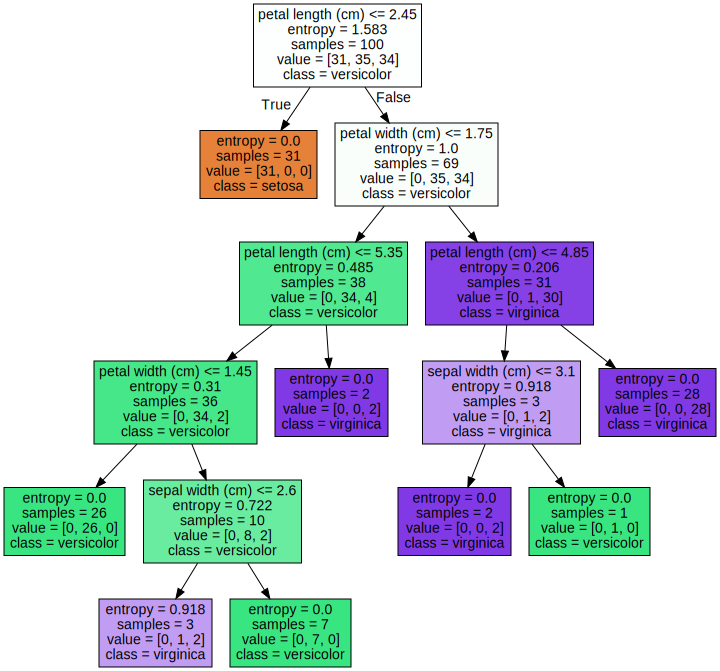

In [ ]:
#visualisation de l'arbre de decision avec graphviz
import graphviz
dot_data = tree.export_graphviz(clf_entr, out_file= None, feature_names=iris.feature_names,
                           class_names=iris.target_names, filled=True)
graph=graphviz.Source(dot_data)
graph



# 10. Confusion matrix


A confusion matrix helps summarize the performance of a classification algorithm. A confusion matrix will give a clear picture of the perfomance of a classification model as well as the types of errors produced by the it. <br>
It gives a summary of correct and incorrect predictions broken down by each category.


Four types of outcomes are possible while evaluating a classification model performance :


**True Positives (TP)** – We predict that an observation belongs to a certain class *x* and the observation actually belongs to that class *x*.


**True Negatives (TN)** – We predict that an observation does not belong to a certain class *x* and the observation actually does not belong to that class *x*.


**False Positives (FP)** – We predict that an observation belongs to a certain class *x* but the observation actually **does not belong** to that class *x*. This type of error is called Type I error.



**False Negatives (FN)** – We predict that an observation does not belong to a certain class *x* but the observation **actually belongs** to that class *x*. This is a very serious error and it is called Type II error.



In [ ]:
# Print the Confusion Matrix for GINI and identify the four pieces
# Use sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("la matrice de confusion")
confMat=confusion_matrix(y_test,y_pred_gini)
display = ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=iris.target_names )
display.plot()
plt.show()



la matrice de confusion


In [ ]:
# Print the Confusion Matrix for Entropy and identify the four pieces
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confMat = confusion_matrix(y_test, y_pred_entr)
display= ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=iris.target)
display.plot()
plt.show()
#print(confMat)


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (150).

# 11. Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validation score for GINI with 10 folds
score_gini=cross_val_score(clf_gini, x,y, cv=10)
print("le score est :" , score_gini)
print("la moyenne est :{:.2f}".format(score_gini.mean())) #moyenne du score
print("l'ecart du score de validation est:{:.2f}".format(score_gini.std()))
# Cross validation score for Entropy with 10 folds
score_entro= cross_val_score(clf_entr, x, y, cv=10)
print("le score pour l'entropie est :", score_entro)
print("la moyenne des score est: {:.2f}".format(score_entro.mean()))



le score est : [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
la moyenne est :0.96
l'ecart du score de validation est:0.03
le score pour l'entropie est : [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
la moyenne des score est: 0.95


# 12. Classification Report

**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model.

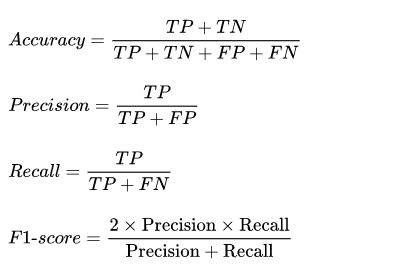

In [ ]:
from sklearn.metrics import classification_report

# Classification report for GINI
classifi_gini=classification_report(y_test, y_pred_gini, target_names=iris.target_names)
print(classifi_gini)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
# Classification report for Entropy


# 13. Decision Boundaries

The two most correlated features for the classification are the petal length and the petal width whereas the two least correlated features are the sepal length and the sepal width.

In [ ]:
# Print decision boundary for decision tree with gini index
from sklearn.inspection import DecisionBoundaryDisplay

# Decision boundary for sepal length and sepal width only


In [ ]:
# Decision boundary for petal length and petal width only


Visually, we can see that using only the petals attributes, the classification is better than using only the sepal attributes.

# Principal Component Analysis

Principal Component Analysis is a dimensionality reduction technique. It is used to reduce the number of features in a dataset. It is used to reduce the complexity of the model and to reduce the training time. It is also used to visualise high dimensional data. <br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA


# References :
1. https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#13.-Decision-Tree-Classifier-with-criterion-gini-index-
2. https://scikit-learn.org/
3. https://www.datacamp.com/tutorial/machine-learning-in-r
4. https://www.datacamp.com/tutorial/decision-tree-classification-python
5. https://www.tutorialexample.com/an-introduction-to-accuracy-precision-recall-f1-score-in-machine-learning-machine-learning-tutorial/